In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('sample_data/online_shoppers_intention.csv')

## Descriptive Statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Insight\:
1. Data terdiri dari 12330 baris
2. Tampak tidak ada issue kolom yang memiliki null/missing values
3. Sepertinya tidak ada issue yang mencolok pada tipe data untuk setiap kolom (sudah sesuai)

## Cuplikan Data

In [5]:
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
11343,8,204.107143,0,0.0,15,347.732143,0.000000,0.012281,18.080714,0.0,Nov,1,1,1,2,New_Visitor,False,False
6581,0,0.000000,0,0.0,42,2084.479524,0.004762,0.014921,0.000000,0.0,Oct,1,1,1,2,Returning_Visitor,False,False
4735,0,0.000000,0,0.0,6,24.000000,0.133333,0.166667,0.000000,0.8,May,2,2,7,3,Returning_Visitor,False,False
9295,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Dec,3,2,3,1,Returning_Visitor,True,False
11533,7,95.750000,0,0.0,41,1164.202381,0.004545,0.010606,27.078469,0.0,Dec,3,2,5,1,Returning_Visitor,True,True


Insight\:
Sepertinya tidak ada anomali (penyimpangan) terhadap entri setiap kolom.

In [6]:
df['Browser_Cats'] = df['Browser'].astype(str)
df['SpecialDay_Cats'] = df['SpecialDay'].astype(str)
df['OperatingSystems_Cats'] = df['OperatingSystems'].astype(str)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## Statistical Summary

In [8]:
nums = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay','OperatingSystems','Browser','Region','TrafficType']
cats = ['Month','VisitorType','Weekend','Revenue','Browser_Cats','SpecialDay_Cats','OperatingSystems_Cats']

In [9]:
df[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


Insight\:
1. Kolom 'SpecialDay' ternyata bernilai boolean/binary.
2. Seluruh kolom yang ada yaitu skew ke kanan (long-right tail).
3. Kolom dengan skew kanan yang paling mendekati normal ada pada kolom : 'ExitRates', 'Region'.

In [10]:
df[cats].describe()

,Month,VisitorType,Weekend,Revenue,Browser_Cats,SpecialDay_Cats,OperatingSystems_Cats
count,12330,12330,12330,12330,12330,12330,12330
unique,10,3,2,2,13,6,8
top,May,Returning_Visitor,False,False,2,0.0,2
freq,3364,10551,9462,10422,7961,11079,6601


Insight\:
1. Data dinominasi (proporsi lebih dari 50% dari jumlah baris data) oleh Returning_Visitor (`VisitorType`), artinya proporsi dari visitor lama jauh lebih banyak dari visitor baru (New_Visitor) dan others, serta pada kolom Weekend, Revenue, Browser_Cats, SpecialDays_Cats, dan OperatingSystems_Cats juga dinominasi oleh satu nilai.
2. Terdapat jumlah nilai unique yang lumayan banyak, yaitu pada kolom Browser_Cats 

## Value Counting

In [11]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Month:
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

Value count kolom VisitorType:
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

Value count kolom Weekend:
False    9462
True     2868
Name: Weekend, dtype: int64

Value count kolom Revenue:
False    10422
True      1908
Name: Revenue, dtype: int64

Value count kolom Browser_Cats:
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser_Cats, dtype: int64

Value count kolom SpecialDay_Cats:
0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay_Cats, dtype: int64

Value count kolom OperatingSystems_Cats:
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems_

## Univariate Analysis

### Box Plots

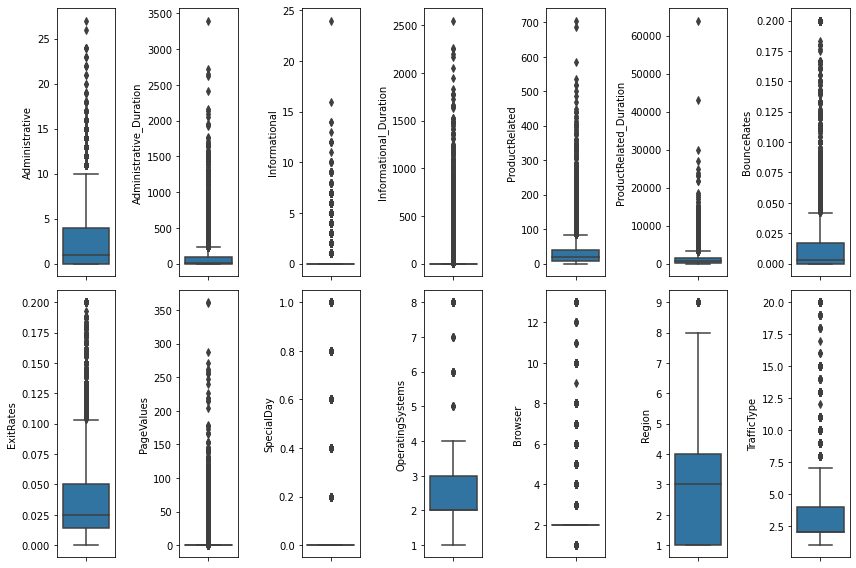

In [12]:
features = nums
plt.figure(figsize=(12, 8))
for i in range(0, len(features)):
    plt.subplot(2, len(features)/2, i+1)
    sns.boxplot(y=df[features[i]], orient='v')
    plt.tight_layout()

Insight\:

Mayoritas data memiliki outlier yang sangat menyimpang kecuali pada kolom 'Region'.

### Dist Plots

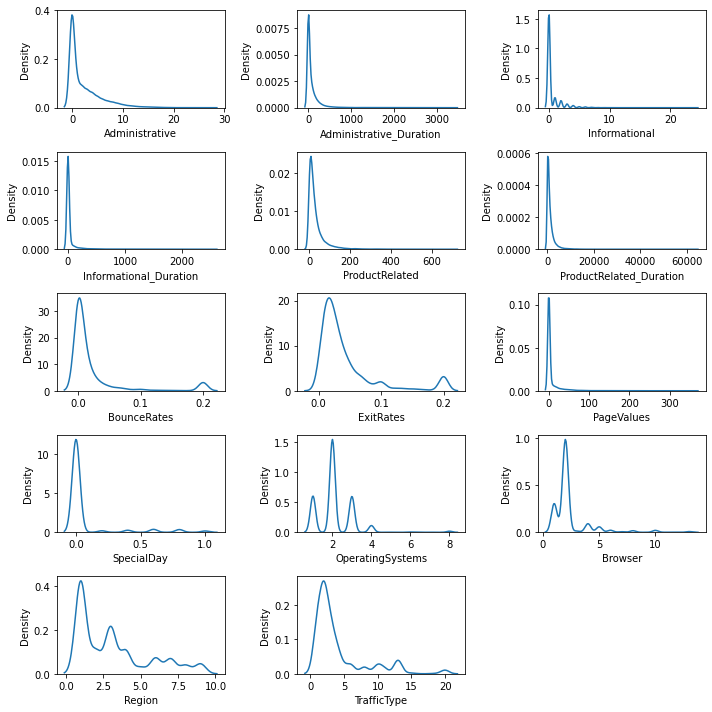

In [13]:
features = nums
plt.figure(figsize=(10, 10))
for i in range(0, len(nums)):
    plt.subplot(5, len(nums)/4, i+1)
    sns.kdeplot(x=df[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

Insight\:
* Kolom 'ExitRates' dan 'Region' tampak sudah mendekati distribusi normal.
* Seperti dugaan kita ketika melihat boxplot di atas, kolom lainnya selain 'ExitRates' dan 'Region' lumayan *skewed*, terutama kolom 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'PageValues' (Berarti ada kemungkinan kita perlu melakukan sesuatu pada kolom-kolom tersebut nantinya)
* Kolom 'SpecialDay' sejatinya adalah biner, sehingga tidak perlu terlalu diperhatikan bentuk distribusinya

### Count Plots (Categorical)

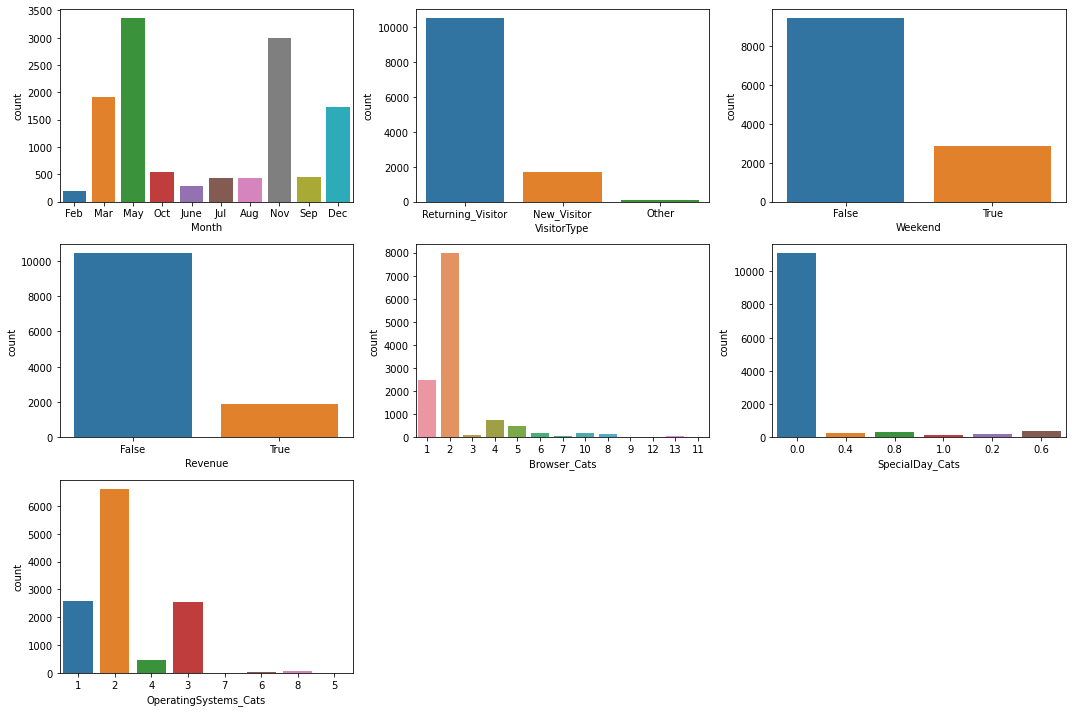

In [14]:
plt.figure(figsize=(15, 10))
for i in range(0, len(cats)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x = df[cats[i]], orient='v')
    plt.tight_layout()




*   Terdapat beberapa nilai yang mendominasi suatu kolom pada tipe data kategorik diatas.





## Bivariate Analysis

### Correlation Heatmap

In [15]:
df.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


<AxesSubplot:>

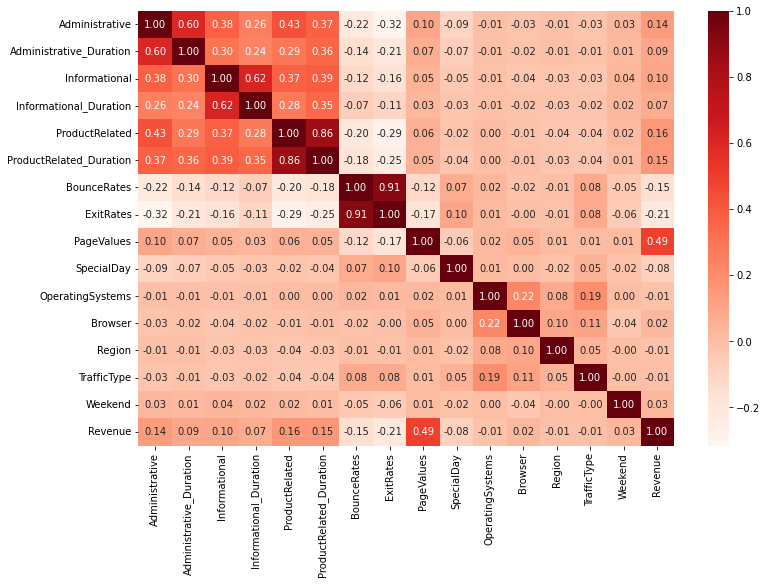

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='Reds', annot=True, fmt='.2f')

Dari *correlation heatmap* di atas dapat dilihat bahwa:
* Target variable kami 'Revenue' berkorelasi positif cukup kuat dengan variabel 'PageValues' (strong potential feature)
* Ia juga memiliki korelasi positif lemah dengan 'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', dan 'ProductRelated-Duration'(decent potential feature)
* Ia juga memiliki korelasi negatif lemah dengan 'BounceRates', 'ExitRates', dan 'SpecialDay' (decent potential feature)
* Sedangkan korelasi 'Revenue' dengan 'OperatingSystems', 'Browser', 'Region', 'TrafficType', dan 'Weekend' sangat lemah ~0, ini menandakan bisa jadi mereka bukan fitur yang potensial
* 'ExitRates' memiliki korelasi positif sangat kuat dengan 'BounceRates'. Ada kemungkinan kedua *feature* ini redundan (dipilih salah satunya saja untuk training data)
* 'ProductRelated' memiliki korelasi positif sangat kuat dengan 'ProductRelated_Duration'. Ada kemungkinan kedua *feature* ini redundan (dipilih salah satunya saja untuk training data)

### Pair PLots

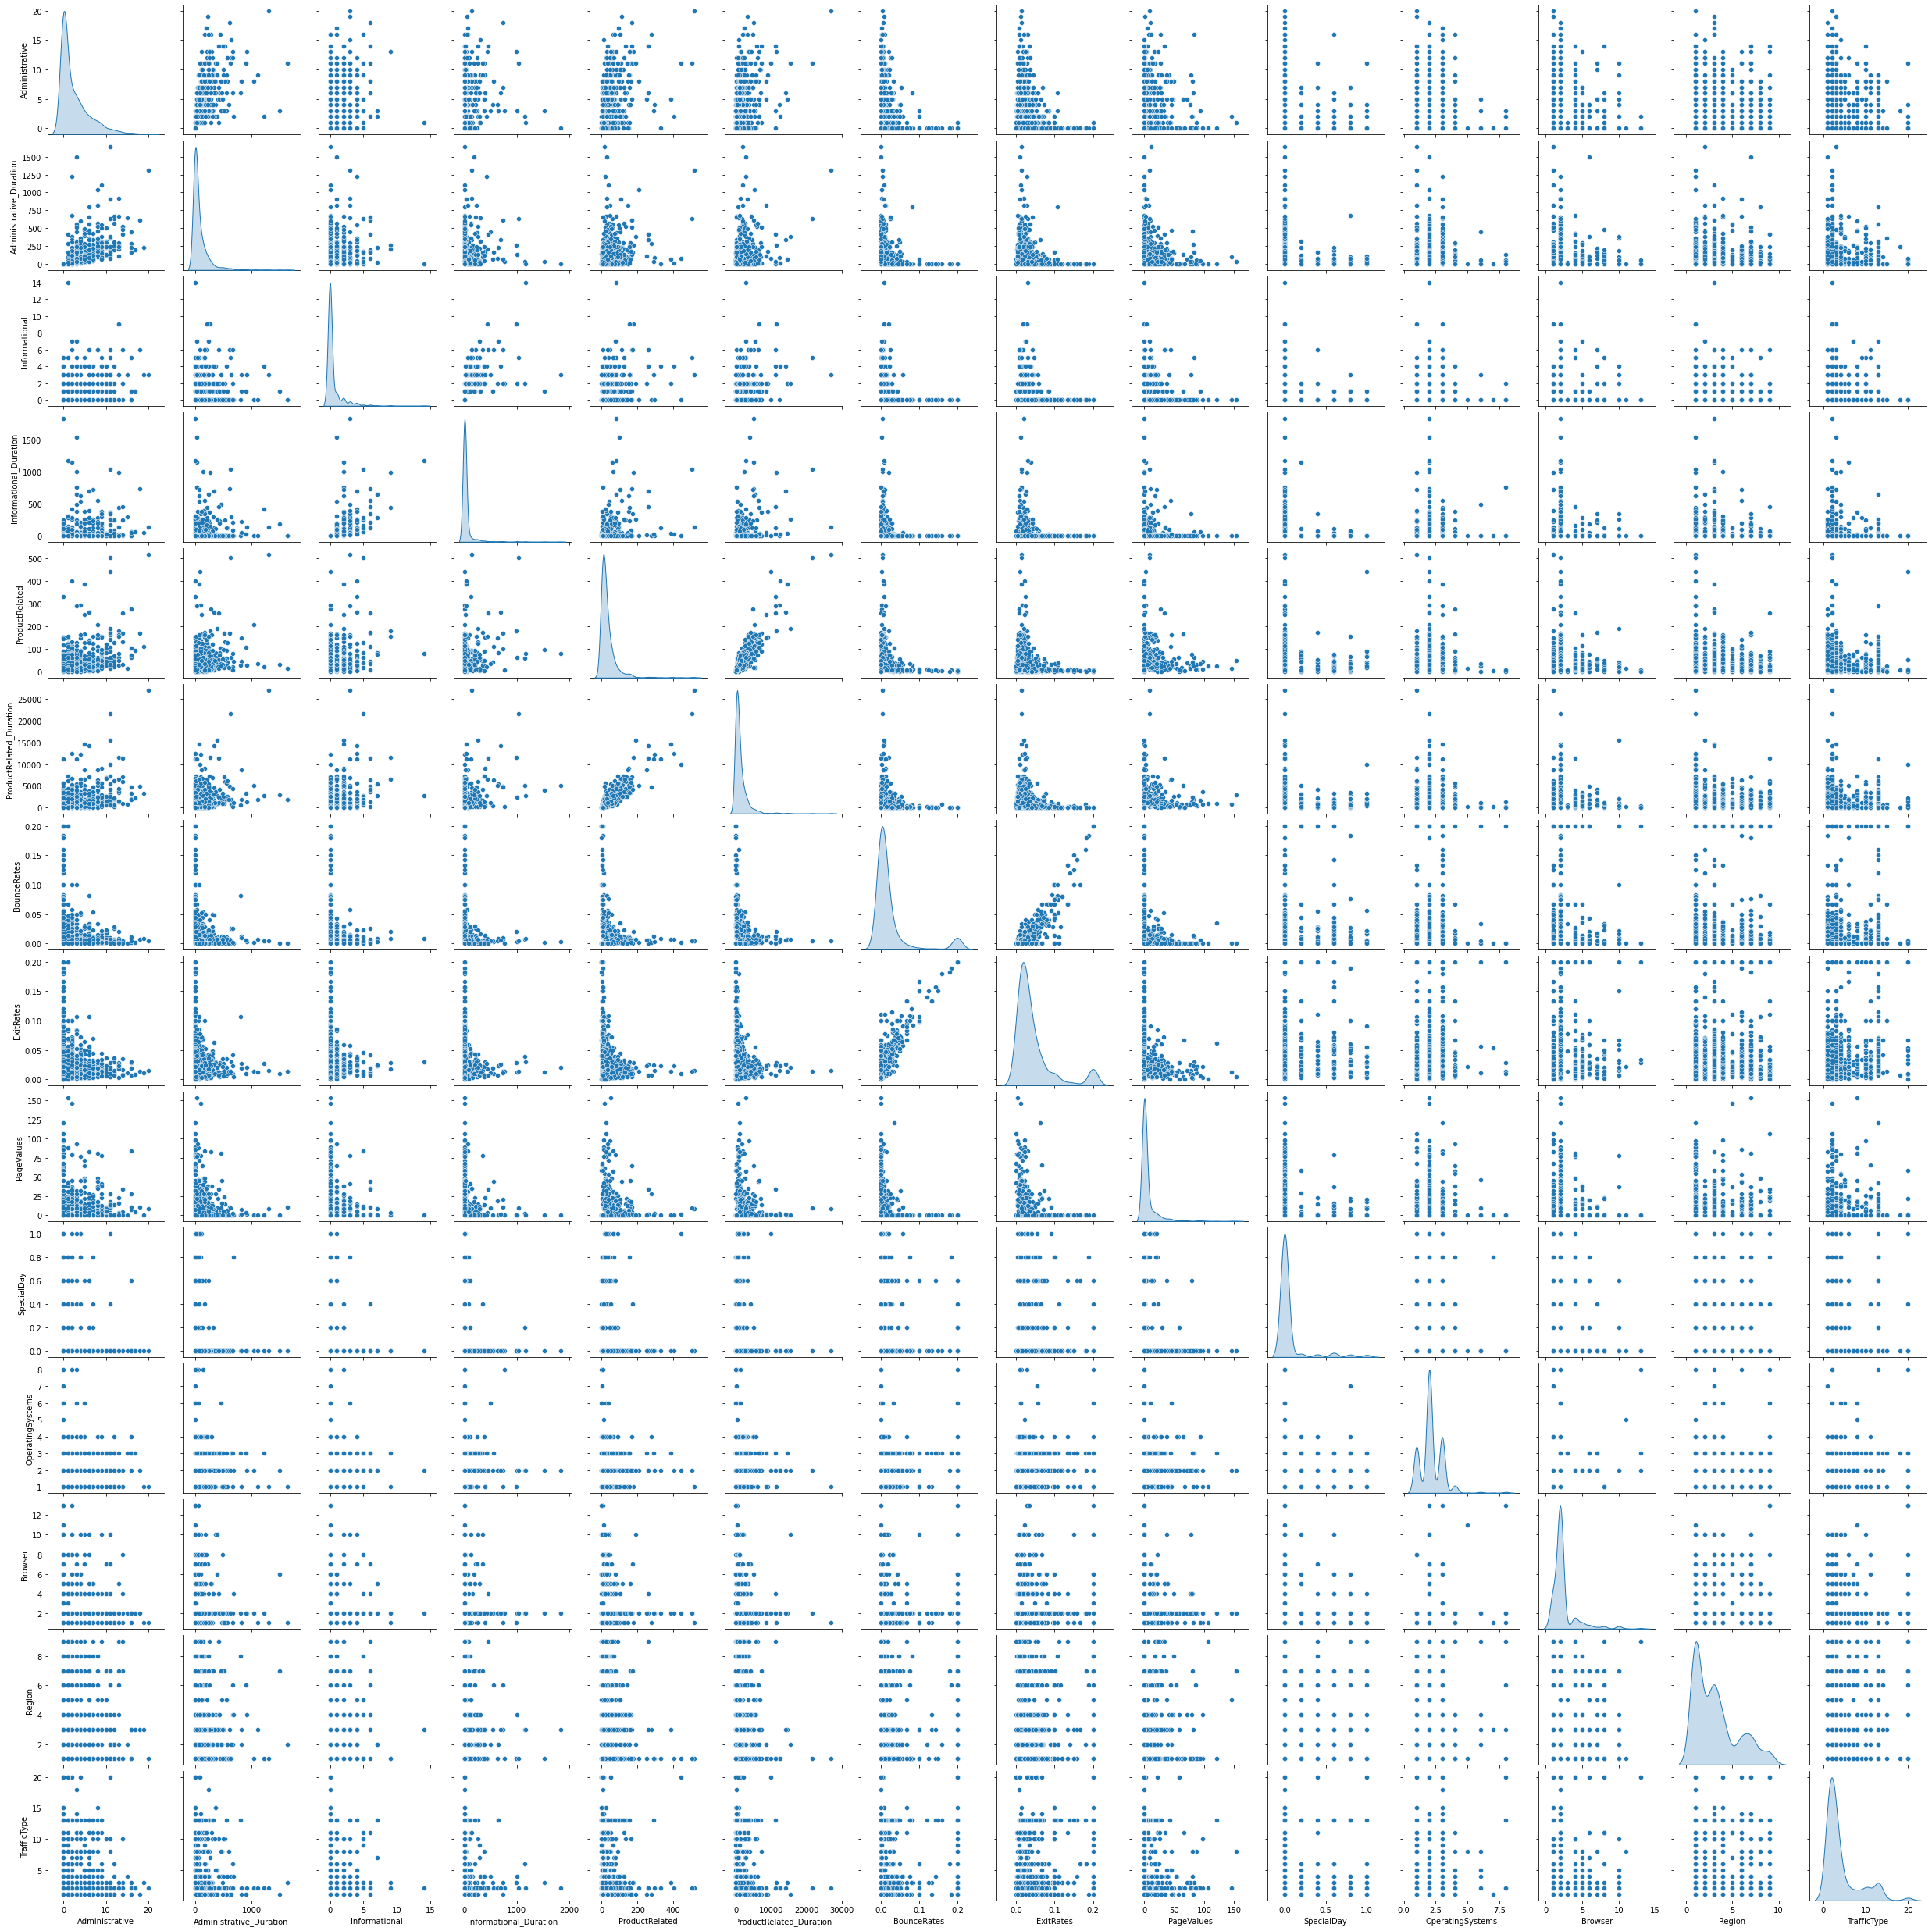

In [17]:
df_sample = df.sample(1000, random_state=42)
sns.pairplot(df_sample[nums], diag_kind='kde')

Dari pair plot di atas, kita juga dapat melilhat hal yang mirip:
* 'ExitRates' dan 'BounceRates' sangat jelas memiliki korelasi linear positif.
* 'ProductRelated' dan 'ProductRelated_Duration' sangat jelas memiliki korelasi linear positif.

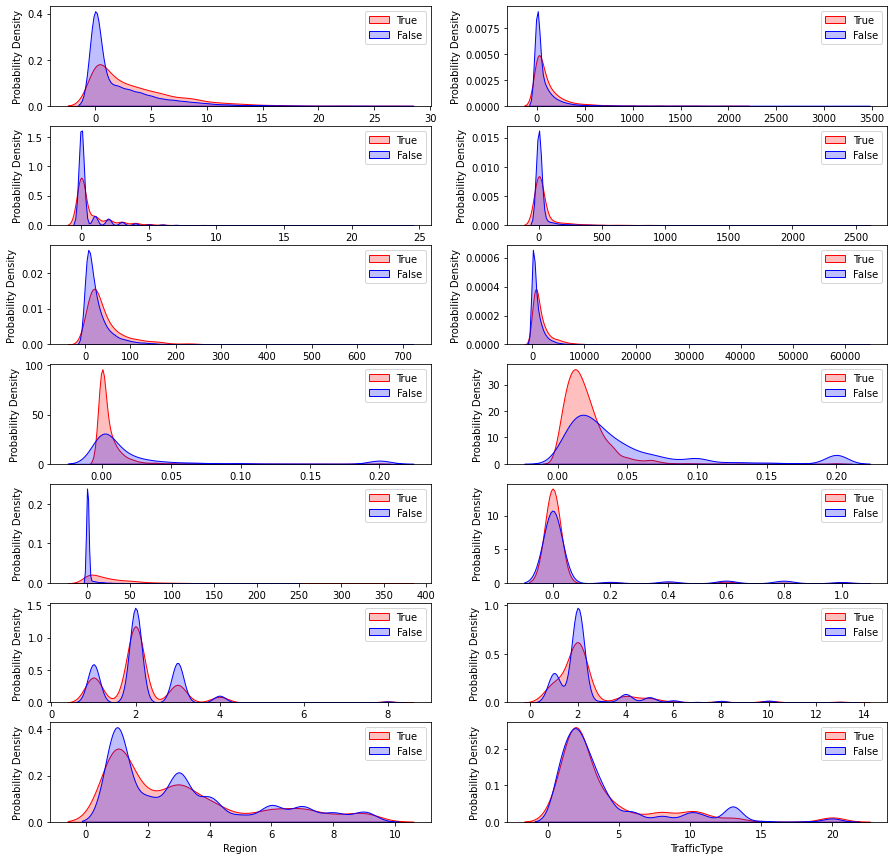

In [18]:
features2 = nums
plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    plt.subplot(7, len(nums)/5, i+1)
    sns.kdeplot(df.loc[(df['Revenue']== True), features2[i]], color='r', shade=True)
    sns.kdeplot(df.loc[(df['Revenue']== False), features2[i]], color='b', shade=True)
    plt.xlabel(features2[i])
    plt.ylabel('Probability Density')
    plt.legend(["True", "False"], loc ="upper right")

 

*   Terdapat sedikit perbedaan pada kolom Administrative antara True dan False,bahwa seseorang yang melakukan Revenue cenderung sedikit mempunyai nilai yang lebih besar dibanding yang tidak, begitu pula dengan ProductRelated, ProductRelated_Duration, dan PageValues.
*   Namun pada kolom yang lainnya hampir memiliki nilai yang sama antara yang melakukan Revenue (True) ataupun tidak (False).


### Business Insight

(0.0, 13000.0)

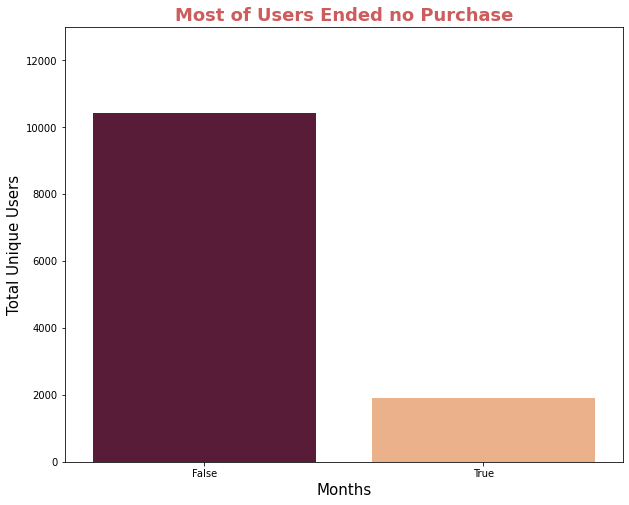

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(df['Revenue'], palette=['#621237',"#FAAE7B"])
plt.title('Most of Users Ended no Purchase',
           color='indianred',
           fontsize=18,
           fontweight='bold')

plt.ylabel('Total Unique Users', fontsize=15)
plt.xlabel('Months', fontsize=15)
plt.ylim(0, 13000)

$\textbf{Insight:}$
- Terlihat bahwa banyak visitor yang mengunjungi situs belanja namun sangat sedikit visitor yang berakhir melakukan transaksi/purchasing.
- Di bawah ini akan dilakukan beberapa analisis untuk mengetahui apa saja yang dapat mempengaruhi kehendak visitor untuk melakukan pembayaran sehingga dapat menentukan strategi marketing untuk meningkatkan revenue.

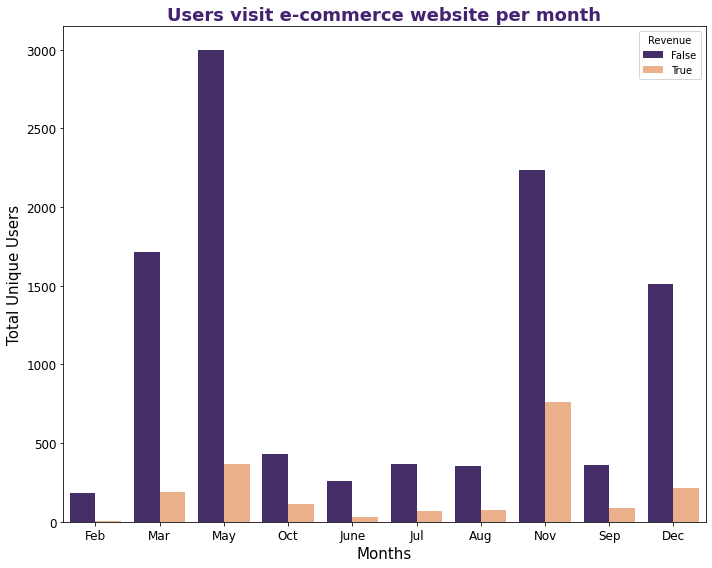

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(x='Month', 
              hue='Revenue', 
              data=df,
              palette=['#432371',"#FAAE7B"])

plt.title('Users visit e-commerce website per month',
           color='#432371',
           fontsize=18,
           fontweight='bold')
plt.ylabel('Total Unique Users', fontsize=15)
plt.xlabel('Months', fontsize=15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)

plt.tight_layout()

$\textbf{Insight:}$
- Apabila dilihat dari fitur Month, Bulan Mei dan November menunjukkan lebih banyak visitor dibandingkan dengan bulan lainnya. Pada Bulan November, meski visitor yang melakukan transaksi lebih sedikit dibandingkan visitor yang tidak melakukan transaksi, namun apabila dibandingkan dengan bulan lainnya terlihat cukup signifikan. 

(0.0, 12500.0)

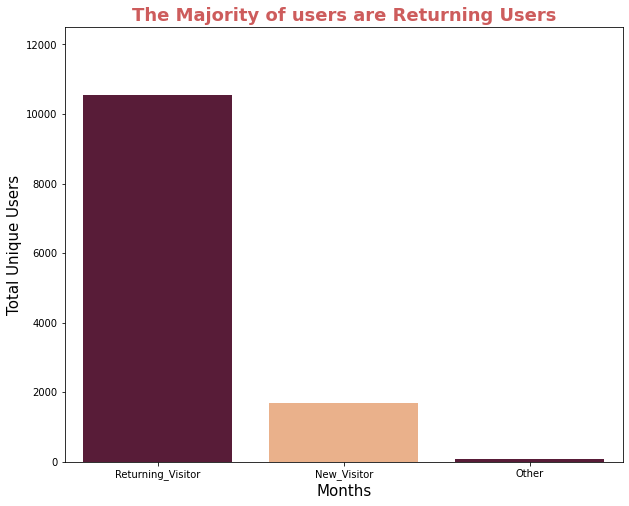

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(df['VisitorType'], palette=['#621237',"#FAAE7B"])
plt.title('The Majority of users are Returning Users',
           color='indianred',
           fontsize=18,
           fontweight='bold')

plt.ylabel('Total Unique Users', fontsize=15)
plt.xlabel('Months', fontsize=15)
plt.ylim(0, 12500)

$\textbf{Insight:}$
- Sebagian besar pengunjung situs belanja online adalah Returning Visitor yang merupakan pengunjung lama yang sering dan kembali membuka situs tersebut.

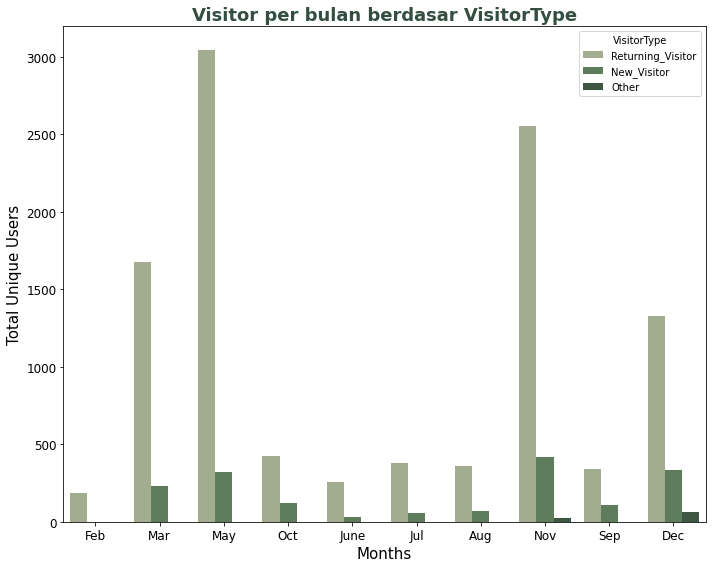

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(x='Month', 
              hue='VisitorType', 
              data=df,
              palette=['#a3b18a', '#588157', '#3a5a40'])

plt.title('Visitor per bulan berdasar VisitorType',
           color='#344e41',
           fontsize=18,
           fontweight='bold')
plt.ylabel('Total Unique Users', fontsize=15)
plt.xlabel('Months', fontsize=15) 
plt.tick_params(axis = 'both', which = 'major', labelsize = 12);

plt.tight_layout()

$\textbf{Insight:}$
- Pada Bulan Februari, jenis visitor terbanyak yakni Returning Visitor, namun apabila dilihat dari jumlah visitor yang melakukan transaksi sangat sedikit. Maka perlu ada strategi khusus yang dilakukan pada Bulan Februari supaya jumlah transaksi meningkat.
- Dari grafik jenis visitor maupun grafik yang menampilkan jumlah visitor yang mengunjungi situs belanja online, terlihat bahwa bulan Maret, Mei, November, dan Desember memiliki visitor yang lebih banyak, baik itu visitor yang berakhir melakukan transaksi ataupun visitor yang hanya berkunjung saja. Kita bisa kaitkan hal ini dengan fitur Special Day pada bulan-bulan tersebut. Terlihat juga pada ke-empat bulan tersebut, lebih banyak pengunjung baru dibandingkan dengan bulan lainnya.

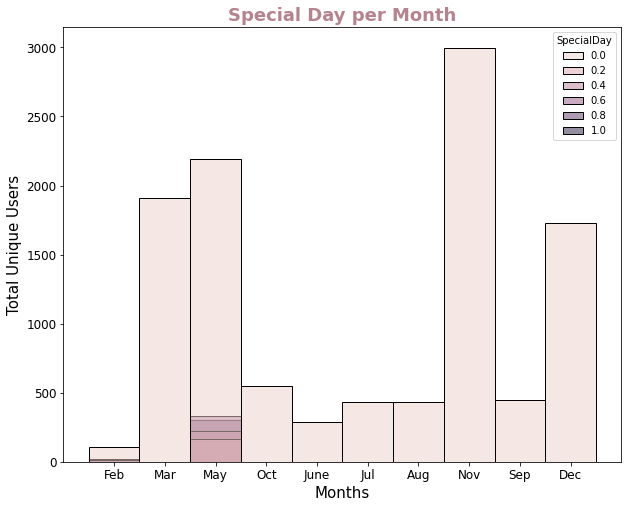

In [23]:
plt.figure(figsize=(10,8))
sns.histplot(x='Month', 
            hue='SpecialDay', 
            data=df
           )


plt.title('Special Day per Month',
           color='#b5838d',
           fontsize=18,
           fontweight='bold')

plt.ylabel('Total Unique Users', fontsize=15)
plt.xlabel('Months', fontsize=15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)

$\textbf{Insight:}$
- Ternyata Special Day lebih banyak terdapat pada bulan Mei dan Februari. Bulan Mei memiliki Special Day terbanyak. November dengan revenue yang besar ternyata tidak menunjukkan adanya jumlah Special Day yang signifikan. Maka perlu dianalisis lebih lanjut korelasinya pada Special Day.

(0.0, 40.0)

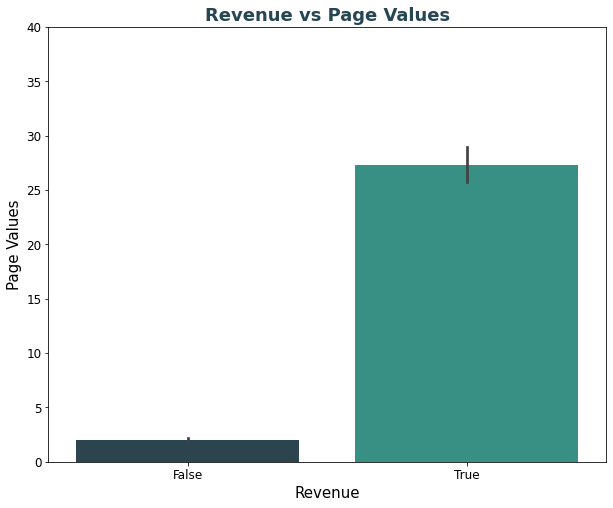

In [24]:
plt.figure(figsize=(10,8))
sns.barplot(x='Revenue',
            y='PageValues',
            data=df,
            palette=['#264653', '#2a9d8f'])
plt.title('Revenue vs Page Values',
           color='#264653',
           fontsize=18,
           fontweight='bold')
plt.ylabel('Page Values', fontsize=15)
plt.xlabel('Revenue', fontsize=15) 
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.ylim(0, 40)

$\textbf{Insight:}$
- Page Value merupakan parameter yang sangat berpengaruh pada target revenue. Semakin tinggi nilai Page Valu maka transaksi meningkat.